# Centralité des réseaux sociaux

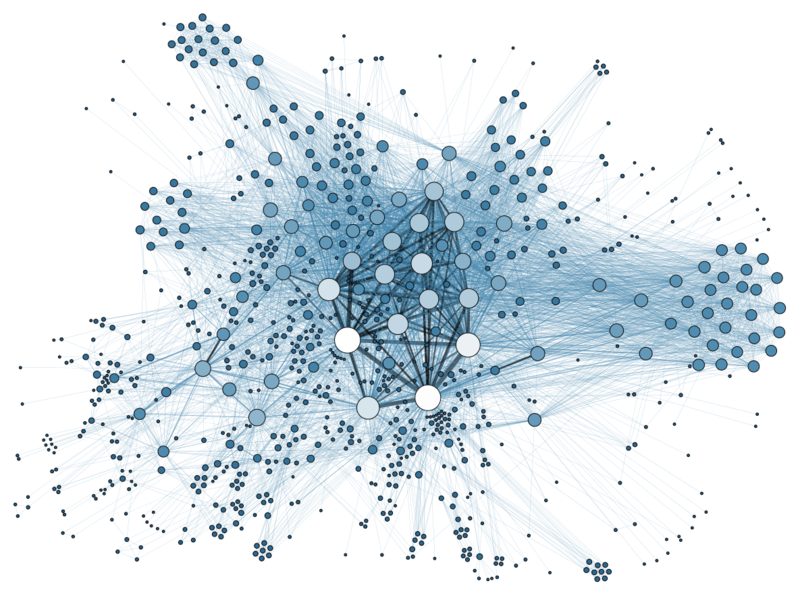

## Centralité PageRank


### Réseau 0

Dans un premier temps on va essayer d'ecrire la matrice d'adjacence correspond à notre "réseau 0"

In [1]:
!pip install networkx matplotlib

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class Graphe:
    def __init__(self, sommets):
        self.sommets = sommets
        self.matrice_adjacence = np.zeros((len(sommets), len(sommets)))

    def ajouter_arete(self, sommet1, sommet2):
        index1 = self.sommets.index(sommet1)
        index2 = self.sommets.index(sommet2)
        self.matrice_adjacence[index1][index2] = 1
        self.matrice_adjacence[index2][index1] = 1

    def obtenir_matrice_adjacence(self):
        return self.matrice_adjacence

    def nombre_de_sommets(self):
        return len(self.sommets)

    def nombre_d_aretes(self):
        nombre_aretes = int(np.sum(self.matrice_adjacence) / 2)
        return nombre_aretes

    def tracer_reseau(self):
        G = nx.Graph()

        for i in range(len(self.sommets)):
            for j in range(i + 1, len(self.sommets)):
                if self.matrice_adjacence[i][j] == 1:
                    G.add_edge(self.sommets[i], self.sommets[j])

        pos = nx.spring_layout(G)

        # Personnalisation des nœuds
        nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=800, alpha=0.8)

        # Personnalisation des arêtes
        nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')

        # Personnalisation des labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_family='sans-serif')

        plt.title("Representation de réseau 0")
        plt.show()

# Réseau 0
sommets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
graph = Graphe(sommets)
# Ajout des arêtes
graph.ajouter_arete('A', 'B')
graph.ajouter_arete('B', 'C')
graph.ajouter_arete('B', 'E')
graph.ajouter_arete('A', 'D')
graph.ajouter_arete('E', 'D')
graph.ajouter_arete('A', 'F')
graph.ajouter_arete('F', 'G')
graph.ajouter_arete('F', 'I')
graph.ajouter_arete('H', 'I')

# Calcul du nombre de nœuds et d'arêtes
nombre_sommets = graph.nombre_de_sommets()
nombre_aretes = graph.nombre_d_aretes()



In [38]:
# Récupération de la matrice d'adjacence
A = graph.obtenir_matrice_adjacence()

# pour afficher la matrice d'adjacence
print(A)

[[0. 1. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0.]]


In [39]:
# Le nombre des noeuds
print(f"Nombre de nœuds : {nombre_sommets}")
# Le nombre d'arêtes
print(f"Nombre d'arêtes : {nombre_aretes}")

Nombre de nœuds : 9
Nombre d'arêtes : 9


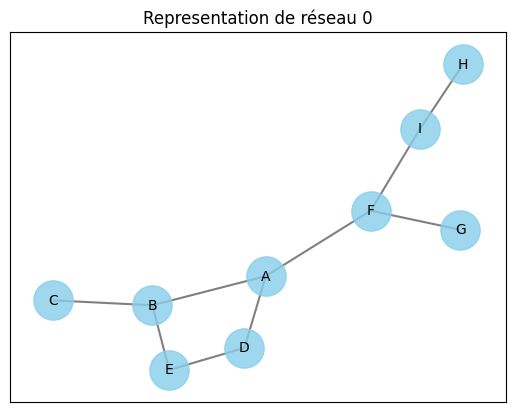

In [40]:
# Tracer le réseau
graph.tracer_reseau()

Dans ce qui suit on va calculer la centralité de Katz - PageRank pour l'ensemble des sommets, en utilisant une approche de l'algèbre lineaire.

In [41]:
import numpy as np

class Graphe:
    def __init__(self, sommets):
        self.sommets = sommets
        self.matrice_adjacence = np.zeros((len(sommets), len(sommets)))

    def ajouter_arete(self, sommet1, sommet2):
        index1 = self.sommets.index(sommet1)
        index2 = self.sommets.index(sommet2)
        self.matrice_adjacence[index1][index2] = 1
        self.matrice_adjacence[index2][index1] = 1


    def obtenir_matrice_adjacence(self):
        return self.matrice_adjacence


    def obtenir_transposee(self, matrice):
        return matrice.transpose()

    def obtenir_matrice_degre_inverse(self):
        degres = np.sum(self.matrice_adjacence, axis=1)
        degres_inverse = 1 / degres
        degres_inverse[np.isinf(degres_inverse)] = 0  # Remplace l'inf par 0 pour les sommets sans arêtes
        matrice_degre_inverse = np.diag(degres_inverse)
        return matrice_degre_inverse

    def obtenir_matrice_centralite_pagerank(self, alpha, beta):
        A_transpose = self.obtenir_transposee(self.matrice_adjacence)
        matrice_degre_inverse = self.obtenir_matrice_degre_inverse()
        I = np.identity(len(self.sommets))
        P = np.ones((len(self.sommets), 1))

        # Correction ici en utilisant P comme une matrice 2D avec une seule colonne
        Cp = np.linalg.inv(I - alpha * np.dot(A_transpose, matrice_degre_inverse)) @ (beta * P)

        return Cp


# Exemple d'utilisation
sommets = ['A','B','C','D','E','F','G','H','I']
graph = Graphe(sommets)

# Ajout des arêtes
graph.ajouter_arete('A', 'B')
graph.ajouter_arete('B', 'C')
graph.ajouter_arete('B', 'E')
graph.ajouter_arete('A', 'D')
graph.ajouter_arete('E', 'D')
graph.ajouter_arete('A', 'F')
graph.ajouter_arete('F', 'G')
graph.ajouter_arete('F', 'I')
graph.ajouter_arete('H', 'I')


# Récupération de la matrice d'adjacence
A = graph.obtenir_matrice_adjacence()


Pour les valeurs de Alpha = 1 et Beta = 0


In [42]:
# Paramètres alpha et beta
alpha = 1
beta = 0

# Calcul de la matrice de centralité PageRank Cp
Cp = graph.obtenir_matrice_centralite_pagerank(alpha, beta)

print("Matrice de centralité PageRank Cp pour les valeurs alpha = 1 et beta = 0 :")
print(Cp)

Matrice de centralité PageRank Cp pour les valeurs alpha = 1 et beta = 0 :
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Pour les valeurs de Alpha = 0.85 et Beta = 1




In [43]:
# Paramètres alpha et beta
alpha = 0.85
beta = 1

# Calcul de la matrice de centralité PageRank Cp
Cp = graph.obtenir_matrice_centralite_pagerank(alpha, beta)

print("Matrice de centralité PageRank Cp :")
print(Cp)

Matrice de centralité PageRank Cp :
[[9.15056407]
 [9.39770481]
 [3.66268303]
 [6.28442424]
 [6.33356333]
 [9.94235557]
 [3.81700074]
 [4.10524511]
 [7.30645909]]


Pour les valeurs de Alpha = 0 et Beta = 1

In [44]:
# Paramètres alpha et beta
alpha = 0
beta = 1

# Calcul de la matrice de centralité PageRank Cp
Cp = graph.obtenir_matrice_centralite_pagerank(alpha, beta)
print("Matrice de centralité PageRank Cp :")
print(Cp)

Matrice de centralité PageRank Cp :
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


### Soc-Karate


La première étape est de générer la matrice d'adjacence d'après les données de soc-karate.txt

In [45]:
def generer_matrice_adjacence(fichier):
    # Lire le fichier et extraire le nombre de sommets et d'arêtes
    with open(fichier, 'r') as file:
        lignes = file.readlines()

    # Extraire le nombre de sommets et d'arêtes de la première ligne
    nombre_sommets, nombre_aretes = map(int, lignes[0].strip().split())

    # Initialiser la matrice d'adjacence avec des zéros
    KARATE = [[0] * nombre_sommets for _ in range(nombre_sommets)]

    # Remplir la matrice d'adjacence en fonction des arêtes
    for ligne in lignes[1:]:
        sommet1, sommet2 = map(int, ligne.strip().split())
        KARATE[sommet1 - 1][sommet2 - 1] = 1
        KARATE[sommet2 - 1][sommet1 - 1] = 1

    return KARATE

# premier réseau
nom_fichier = "soc-karate.txt"
KARATE = generer_matrice_adjacence(nom_fichier)

# Afficher la matrice d'adjacence nommée "KARATE"
for ligne in KARATE:
    print(ligne)


[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Pour visualiser le graphe :

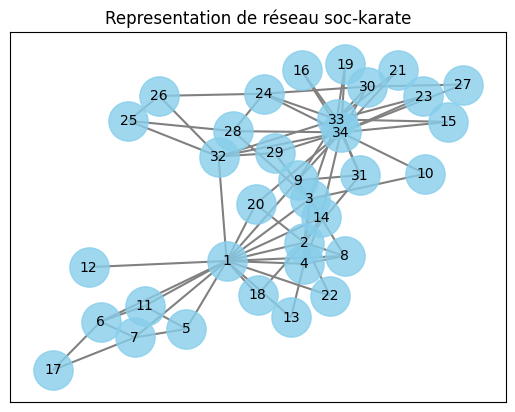

In [46]:
class Graphe:
    def __init__(self, sommets):
        self.sommets = sommets
        self.matrice_adjacence = np.zeros((len(sommets), len(sommets)))

    def ajouter_arete(self, sommet1, sommet2):
        index1 = self.sommets.index(sommet1)
        index2 = self.sommets.index(sommet2)
        self.matrice_adjacence[index1][index2] = 1
        self.matrice_adjacence[index2][index1] = 1

    def obtenir_matrice_adjacence(self):
        return self.matrice_adjacence


    def obtenir_transposee(self, matrice):
        return matrice.transpose()

    def obtenir_matrice_degre_inverse(self):
        degres = np.sum(self.matrice_adjacence, axis=1)
        degres_inverse = 1 / degres
        degres_inverse[np.isinf(degres_inverse)] = 0  
        matrice_degre_inverse = np.diag(degres_inverse)
        return matrice_degre_inverse

    def nombre_de_sommets(self):
        return len(self.sommets)

    def nombre_d_aretes(self):
        nombre_aretes = int(np.sum(self.matrice_adjacence) / 2)
        return nombre_aretes

    def tracer_reseau(self):
        G = nx.Graph()

        for i in range(len(self.sommets)):
            for j in range(i + 1, len(self.sommets)):
                if self.matrice_adjacence[i][j] == 1:
                    G.add_edge(self.sommets[i], self.sommets[j])

        pos = nx.spring_layout(G)

        # Personnalisation des nœuds
        nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=800, alpha=0.8)

        # Personnalisation des arêtes
        nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')

        # Personnalisation des labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_family='sans-serif')

        plt.title("Representation de réseau soc-karate")
        plt.show()

    def obtenir_matrice_centralite_pagerank(self, alpha, beta):
        A_transpose = self.obtenir_transposee(self.matrice_adjacence)
        matrice_degre_inverse = self.obtenir_matrice_degre_inverse()
        I = np.identity(len(self.sommets))
        P = np.ones((len(self.sommets), 1))

        # Correction ici en utilisant P comme une matrice 2D avec une seule colonne
        Cp = np.linalg.inv(I - alpha * np.dot(A_transpose, matrice_degre_inverse)) @ (beta * P)

        return Cp

# Appliquant sur notre matrice d'adjacence KARATE
matrice_adjacence = KARATE

# Créez une instance de la classe Graphe avec les sommets correspondants à votre matrice
sommets = list(range(1, len(matrice_adjacence) + 1))
graph = Graphe(sommets)

# Initialisez la matrice d'adjacence de l'instance Graphe avec votre matrice
graph.matrice_adjacence = np.array(matrice_adjacence)


# Tracer le réseau avec la matrice d'adjacence KARATE
graph.tracer_reseau()

Appliquant maintenant l'algoritheme de PageRank de ce réseau en utilisant les valeurs de alpha et beta suivantes :

In [47]:

# Exemple d'utilisation avec le graphe KARATE
matrice_adjacence = KARATE

# Créez une instance de la classe Graphe avec les sommets correspondants à votre matrice
sommets = list(range(1, len(matrice_adjacence) + 1))
graph = Graphe(sommets)

# Initialisez la matrice d'adjacence de l'instance Graphe avec votre matrice
graph.matrice_adjacence = np.array(matrice_adjacence)

# Paramètres alpha et beta
alpha = 0.85
beta = 0.15  # Vous trouverez la justification d'utiliser ces valeurs dans le rapport

# Calcul de la matrice de centralité PageRank
Cp = graph.obtenir_matrice_centralite_pagerank(alpha, beta)

print("Matrice de centralité PageRank Cp pour le soc-Karate :")
print(Cp)


Matrice de centralité PageRank Cp pour le soc-Karate :
[[3.2979077 ]
 [1.79781542]
 [1.94066932]
 [1.21923516]
 [0.74725038]
 [0.98977926]
 [0.98977926]
 [0.8326769 ]
 [1.01204591]
 [0.4865195 ]
 [0.74725038]
 [0.32520135]
 [0.49792633]
 [1.00423951]
 [0.4942238 ]
 [0.4942238 ]
 [0.57065619]
 [0.49499503]
 [0.4942238 ]
 [0.66655764]
 [0.4942238 ]
 [0.49499503]
 [0.4942238 ]
 [1.0717655 ]
 [0.71658514]
 [0.71421071]
 [0.51149729]
 [0.87175209]
 [0.66549762]
 [0.89381028]
 [0.83606528]
 [1.26337496]
 [2.43756968]
 [3.4312522 ]]


In [48]:
print(min(Cp))

[0.32520135]


### Physicians

La première étape est de générer la matrice d'adjacence d'après les données de soc-physicians.txt

In [49]:
def generer_matrice_adjacence(fichier):
    # Lire le fichier et extraire le nombre de sommets et d'arêtes
    with open(fichier, 'r') as file:
        lignes = file.readlines()

    # Extraire le nombre de sommets et d'arêtes de la première ligne
    nombre_sommets, nombre_aretes = map(int, lignes[0].strip().split())

    # Initialiser la matrice d'adjacence avec des zéros
    PHYS = [[0] * nombre_sommets for _ in range(nombre_sommets)]

    # Remplir la matrice d'adjacence en fonction des arêtes
    for ligne in lignes[1:]:
        sommet1, sommet2 = map(int, ligne.strip().split())
        PHYS[sommet1 - 1][sommet2 - 1] = 1
        PHYS[sommet2 - 1][sommet1 - 1] = 1

    return PHYS

# Exemple d'utilisation avec le nom de fichier "graph.txt"
nom_fichier = "soc-physicians.txt"
PHYS = generer_matrice_adjacence(nom_fichier)

# Afficher la matrice d'adjacence nommée "PHYS"
for ligne in PHYS:
    print(ligne)


[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Pour tracer le graphe soc-physicians :

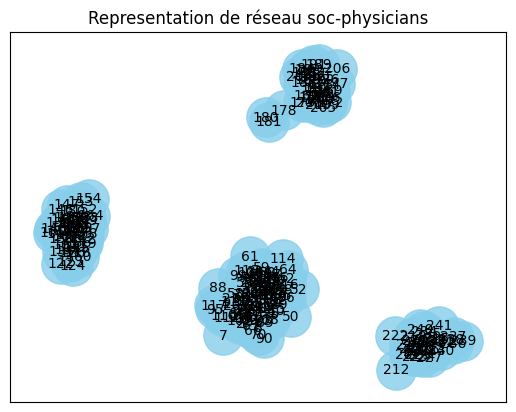

In [50]:
class Graphe:
    def __init__(self, sommets):
        self.sommets = sommets
        self.matrice_adjacence = np.zeros((len(sommets), len(sommets)))

    def ajouter_arete(self, sommet1, sommet2):
        index1 = self.sommets.index(sommet1)
        index2 = self.sommets.index(sommet2)
        self.matrice_adjacence[index1][index2] = 1
        self.matrice_adjacence[index2][index1] = 1

    def obtenir_matrice_adjacence(self):
        return self.matrice_adjacence


    def obtenir_transposee(self, matrice):
        return matrice.transpose()

    def obtenir_matrice_degre_inverse(self):
        degres = np.sum(self.matrice_adjacence, axis=1)
        degres_inverse = 1 / degres
        degres_inverse[np.isinf(degres_inverse)] = 0  # Remplace l'inf par 0 pour les sommets sans arêtes
        matrice_degre_inverse = np.diag(degres_inverse)
        return matrice_degre_inverse

    def nombre_de_sommets(self):
        return len(self.sommets)

    def nombre_d_aretes(self):
        nombre_aretes = int(np.sum(self.matrice_adjacence) / 2)
        return nombre_aretes

    def tracer_reseau(self):
        G = nx.Graph()

        for i in range(len(self.sommets)):
            for j in range(i + 1, len(self.sommets)):
                if self.matrice_adjacence[i][j] == 1:
                    G.add_edge(self.sommets[i], self.sommets[j])

        pos = nx.spring_layout(G)

        # Personnalisation des nœuds
        nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=800, alpha=0.8)

        # Personnalisation des arêtes
        nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')

        # Personnalisation des labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_family='sans-serif')

        plt.title("Representation de réseau soc-physicians")
        plt.show()


    def obtenir_matrice_centralite_pagerank(self, alpha, beta):
        A_transpose = self.obtenir_transposee(self.matrice_adjacence)
        matrice_degre_inverse = self.obtenir_matrice_degre_inverse()
        I = np.identity(len(self.sommets))
        P = np.ones((len(self.sommets), 1))

        # Correction ici en utilisant P comme une matrice 2D avec une seule colonne
        Cp = np.linalg.inv(I - alpha * np.dot(A_transpose, matrice_degre_inverse)) @ (beta * P)

        return Cp

# Appliquant sur notre matrice d'adjacence phys
matrice_adjacence = PHYS

# Créez une instance de la classe Graphe avec les sommets correspondants à notre matrice
sommets = list(range(1, len(matrice_adjacence) + 1))
graph = Graphe(sommets)

# Initialisez la matrice d'adjacence de l'instance Graphe avec notre matrice
graph.matrice_adjacence = np.array(matrice_adjacence)


# Tracer le réseau avec la matrice d'adjacence PHYS
graph.tracer_reseau()

Appliquant maintenant l'algoritheme de PageRank de ce réseau en utilisant les valeurs de alpha et beta suivantes :

In [51]:
# Appliquant sur notre matrice d'adjacence PHYS
matrice_adjacence = PHYS

# Créez une instance de la classe Graphe avec les sommets correspondants à notre matrice
sommets = list(range(1, len(matrice_adjacence) + 1))
graph = Graphe(sommets)

# Initialisez la matrice d'adjacence de l'instance Graphe avec notre matrice
graph.matrice_adjacence = np.array(matrice_adjacence)

# Paramètres alpha et beta
alpha = 0.85
beta = 0.15  # Vous trouverez la justification d'utiliser ces valeurs dans le rapport

# Calcul de la matrice de centralité PageRank
Cp = graph.obtenir_matrice_centralite_pagerank(alpha, beta)

print("Matrice de centralité PageRank Cp pour le soc-Physicians :")
print(Cp)

Matrice de centralité PageRank Cp pour le soc-Physicians :
[[0.94544868]
 [1.01561621]
 [1.1066139 ]
 [1.45971778]
 [1.54030312]
 [0.78061364]
 [0.37808319]
 [0.64214199]
 [1.62856569]
 [1.77174379]
 [1.8208758 ]
 [1.79613778]
 [1.71088169]
 [1.2069924 ]
 [2.94466384]
 [1.61631686]
 [1.07853747]
 [1.09475415]
 [0.95410393]
 [1.05436722]
 [1.04196544]
 [0.96219022]
 [1.99024282]
 [1.16297912]
 [1.49439889]
 [1.22049179]
 [0.87315035]
 [1.18818884]
 [1.57932563]
 [1.00236409]
 [1.10817652]
 [1.09232344]
 [0.97414686]
 [0.75316385]
 [1.20568972]
 [1.33856222]
 [0.76037168]
 [1.11318291]
 [0.77070312]
 [1.91685553]
 [1.31700785]
 [1.15238932]
 [0.96305429]
 [0.9251201 ]
 [1.32594429]
 [1.11155735]
 [1.2927243 ]
 [1.22609403]
 [0.88839019]
 [0.37251138]
 [0.9532282 ]
 [0.49766918]
 [0.88985488]
 [1.44263755]
 [1.3168079 ]
 [0.58934902]
 [0.79680243]
 [1.13393763]
 [0.71787671]
 [1.17076031]
 [0.37809508]
 [0.57743211]
 [1.57114345]
 [0.58679454]
 [0.54334529]
 [0.64422809]
 [1.09457117]
 [0

### Tribes

La première étape est de générer la matrice d'adjacence d'après les données de soc-tribes.txt

In [52]:
def generer_matrice_adjacence(fichier):
    # Lire le fichier et extraire le nombre de sommets et d'arêtes
    with open(fichier, 'r') as file:
        lignes = file.readlines()

    # Extraire le nombre de sommets et d'arêtes de la première ligne
    nombre_sommets, nombre_aretes = map(int, lignes[0].strip().split())

    # Initialiser la matrice d'adjacence avec des zéros
    Tribes = [[0] * nombre_sommets for _ in range(nombre_sommets)]

    # Remplir la matrice d'adjacence en fonction des arêtes
    for ligne in lignes[1:]:
        sommet1, sommet2 = map(int, ligne.strip().split())
        Tribes[sommet1 - 1][sommet2 - 1] = 1
        Tribes[sommet2 - 1][sommet1 - 1] = 1

    return Tribes

# application au réseau
nom_fichier = "soc-tribes.txt"
Tribes = generer_matrice_adjacence(nom_fichier)

# Afficher la matrice d'adjacence nommée "Tribes"
for ligne in Tribes:
    print(ligne)

[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
[1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]
[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]
[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]


Pour tracer le graphe soc-tribes :

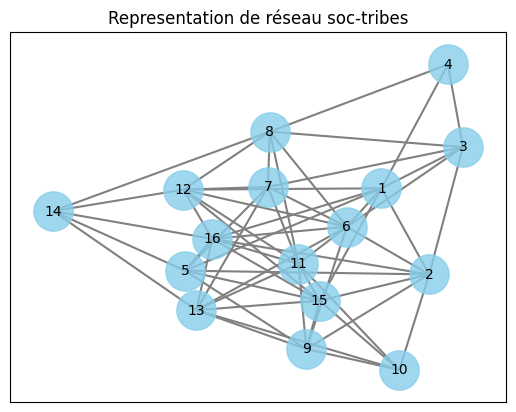

In [53]:
class Graphe:
    def __init__(self, sommets):
        self.sommets = sommets
        self.matrice_adjacence = np.zeros((len(sommets), len(sommets)))

    def ajouter_arete(self, sommet1, sommet2):
        index1 = self.sommets.index(sommet1)
        index2 = self.sommets.index(sommet2)
        self.matrice_adjacence[index1][index2] = 1
        self.matrice_adjacence[index2][index1] = 1

    def obtenir_matrice_adjacence(self):
        return self.matrice_adjacence


    def obtenir_transposee(self, matrice):
        return matrice.transpose()

    def obtenir_matrice_degre_inverse(self):
        degres = np.sum(self.matrice_adjacence, axis=1)
        degres_inverse = 1 / degres
        degres_inverse[np.isinf(degres_inverse)] = 0  
        matrice_degre_inverse = np.diag(degres_inverse)
        return matrice_degre_inverse

    def nombre_de_sommets(self):
        return len(self.sommets)

    def nombre_d_aretes(self):
        nombre_aretes = int(np.sum(self.matrice_adjacence) / 2)
        return nombre_aretes

    def tracer_reseau(self):
        G = nx.Graph()

        for i in range(len(self.sommets)):
            for j in range(i + 1, len(self.sommets)):
                if self.matrice_adjacence[i][j] == 1:
                    G.add_edge(self.sommets[i], self.sommets[j])

        pos = nx.spring_layout(G)

        # Personnalisation des nœuds
        nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=800, alpha=0.8)

        # Personnalisation des arêtes
        nx.draw_networkx_edges(G, pos, width=1.5, edge_color='gray')

        # Personnalisation des labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_family='sans-serif')

        plt.title("Representation de réseau soc-tribes")
        plt.show()


    def obtenir_matrice_centralite_pagerank(self, alpha, beta):
        A_transpose = self.obtenir_transposee(self.matrice_adjacence)
        matrice_degre_inverse = self.obtenir_matrice_degre_inverse()
        I = np.identity(len(self.sommets))
        P = np.ones((len(self.sommets), 1))

        # Correction ici en utilisant P comme une matrice 2D avec une seule colonne
        Cp = np.linalg.inv(I - alpha * np.dot(A_transpose, matrice_degre_inverse)) @ (beta * P)

        return Cp

# Appliquant sur notre matrice d'adjacence Tribes
matrice_adjacence = Tribes

# Créez une instance de la classe Graphe avec les sommets correspondants à notre matrice
sommets = list(range(1, len(matrice_adjacence) + 1))
graph = Graphe(sommets)

# Initialisez la matrice d'adjacence de l'instance Graphe avec notre matrice
graph.matrice_adjacence = np.array(matrice_adjacence)


# Tracer le réseau avec la matrice d'adjacence Tribes
graph.tracer_reseau()

Appliquant maintenant l'algoritheme de PageRank de ce réseau en utilisant les valeurs de alpha et beta suivantes :

In [54]:
# Appliquant sur notre matrice d'adjacence Tribes
matrice_adjacence = Tribes

# Créez une instance de la classe Graphe avec les sommets correspondants à notre matrice
sommets = list(range(1, len(matrice_adjacence) + 1))
graph = Graphe(sommets)

# Initialisez la matrice d'adjacence de l'instance Graphe avec notre matrice
graph.matrice_adjacence = np.array(matrice_adjacence)

# Paramètres alpha et beta
alpha = 0.85
beta = 0.15

# Calcul de la matrice de centralité PageRank
Cp = graph.obtenir_matrice_centralite_pagerank(alpha, beta)

print("Matrice de centralité PageRank Cp pour le soc-tribes :")
print(Cp)

Matrice de centralité PageRank Cp pour le soc-tribes :
[[1.10545929]
 [1.08621793]
 [0.87981743]
 [0.51378288]
 [0.96667219]
 [1.31858439]
 [0.96857937]
 [1.00212846]
 [0.95841622]
 [0.72250772]
 [1.19588613]
 [1.08159393]
 [1.08165727]
 [0.73152238]
 [1.19485129]
 [1.19232311]]


## Centralité d’intermédiarité

### Les algorithmes utilisés

Algorithme de plus court chemin entre deux nœuds.

In [55]:
from collections import deque

def nombre_plus_courts_chemins(graph, source, target):
    queue = deque([(source, [source])])
    nombre_chemins = 0

    while queue:
        current_node, path = queue.popleft()

        if current_node == target:
            nombre_chemins += 1

        for neighbor in graph.neighbors(current_node):
            if neighbor not in path:
                queue.append((neighbor, path + [neighbor]))

    return nombre_chemins

# Exemple d'utilisation
G = nx.Graph()

# Ajout des arêtes
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Choix du nœud source et du nœud cible
source_node = 1
target_node = 5

# Calcul du nombre de plus courts chemins
nombre_chemins = nombre_plus_courts_chemins(G, source_node, target_node)

print(f"Le nombre de plus courts chemins entre {source_node} et {target_node} est : {nombre_chemins}")


Le nombre de plus courts chemins entre 1 et 5 est : 2


Algorithme de plus court chemin entre deux nœuds en passant par un nœud.

In [56]:
from collections import deque

def nombre_plus_courts_chemins_avec_noeud_intermediaire(graph, source, target, intermediate_node):
    queue = deque([(source, [source])])
    nombre_chemins = 0

    while queue:
        current_node, path = queue.popleft()

        if current_node == target and intermediate_node in path:
            nombre_chemins += 1

        for neighbor in graph.neighbors(current_node):
            if neighbor not in path:
                queue.append((neighbor, path + [neighbor]))

    return nombre_chemins

# Exemple d'utilisation
G = nx.Graph()

# Ajout des arêtes
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Choix du nœud source, du nœud cible et du nœud intermédiaire
source_node = 1
target_node = 5
intermediate_node = 4

# Calcul du nombre de plus courts chemins avec le nœud intermédiaire
nombre_chemins = nombre_plus_courts_chemins_avec_noeud_intermediaire(G, source_node, target_node, intermediate_node)

print(f"Le nombre de plus courts chemins entre {source_node} et {target_node} passant par {intermediate_node} est : {nombre_chemins}")


Le nombre de plus courts chemins entre 1 et 5 passant par 4 est : 2


Centralité d'intermédiarité

In [57]:
from collections import deque

class Graphe:
    def __init__(self, sommets):
        self.sommets = sommets
        self.matrice_adjacence = [[0] * len(sommets) for _ in range(len(sommets))]

    def ajouter_arete(self, sommet1, sommet2):
        index1 = self.sommets.index(sommet1)
        index2 = self.sommets.index(sommet2)
        self.matrice_adjacence[index1][index2] = 1
        self.matrice_adjacence[index2][index1] = 1

    def obtenir_matrice_adjacence(self):
        return self.matrice_adjacence

# ici on a réecrire notre algorithme de la cellule précedente pour redefinir la classe :
    def nombre_plus_courts_chemins(self, source, target):
        queue = deque([(source, [source])])
        nombre_chemins = 0

        while queue:
            current_node, path = queue.popleft()

            if current_node == target:
                nombre_chemins += 1

            for neighbor in range(len(self.sommets)):
                if self.matrice_adjacence[current_node][neighbor] == 1 and neighbor not in path:
                    queue.append((neighbor, path + [neighbor]))

        return nombre_chemins

# ici on a réecrire notre algorithme de la cellule précedente pour redefinir la classe :
    def nombre_plus_courts_chemins_avec_noeud_intermediaire(self, source, target, intermediate_node):
        queue = deque([(source, [source])])
        nombre_chemins = 0

        while queue:
            current_node, path = queue.popleft()

            if current_node == target and intermediate_node in path:
                nombre_chemins += 1

            for neighbor in range(len(self.sommets)):
                if self.matrice_adjacence[current_node][neighbor] == 1 and neighbor not in path:
                    queue.append((neighbor, path + [neighbor]))

        return nombre_chemins

# Voici la fonction qui nous permet de calculer la centralité d'intermédiarité en se basant sur les deux algorithmes précedement définis :
    def centralite_intermediarite(self):
        n = len(self.sommets)
        centralite = {sommet: 0 for sommet in self.sommets}

        for i in range(n):
            for j in range(i + 1, n):
                source = i
                target = j

                for k in range(n):
                    if k != i and k != j:
                        intermediate_node = k

                        sigma_st_v = self.nombre_plus_courts_chemins_avec_noeud_intermediaire(source, target, intermediate_node)
                        sigma_st = self.nombre_plus_courts_chemins(source, target)

                        centralite[self.sommets[intermediate_node]] += sigma_st_v / sigma_st

        return centralite

### Application de l'algorithme dans le réseau 0

In [58]:
# Création de notre réseau
sommets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
graph = Graphe(sommets)

# Ajout des arêtes
graph.ajouter_arete('A', 'B')
graph.ajouter_arete('B', 'C')
graph.ajouter_arete('B', 'E')
graph.ajouter_arete('A', 'D')
graph.ajouter_arete('E', 'D')
graph.ajouter_arete('A', 'F')
graph.ajouter_arete('F', 'G')
graph.ajouter_arete('F', 'I')
graph.ajouter_arete('H', 'I')

# Calcul de la centralité d'intermédiarité
centrality = graph.centralite_intermediarite()
print("Centralité d'intermédiarité :")
for sommet, valeur in centrality.items():
    print(f"{sommet}: {valeur}")

Centralité d'intermédiarité :
A: 18.5
B: 12.5
C: 0.0
D: 8.5
E: 8.5
F: 17.0
G: 0.0
H: 0.0
I: 7.0


### Application de l'algorithme

In [68]:
start_node = "H"
end_node = "E"
must_pass = "A"

def shortest_paths_mustpass(G, start_node, end_node, must_pass) :
    all_shortest_paths_must =[]
    all_shortest_paths_start_to_must, lenght_start_to_must = yen_algorithm(G, start_node, must_pass)
    all_shortest_paths_must_to_end, lenght_must_to_end = yen_algorithm(G, must_pass, end_node)
    for shortest_paths_start_to_must in  all_shortest_paths_start_to_must :
        for shortest_paths_must_to_end in all_shortest_paths_must_to_end :
            all_shortest_paths_must += [shortest_paths_start_to_must + shortest_paths_must_to_end[1::]]
    return all_shortest_paths_must, lenght_start_to_must + lenght_must_to_end

def number_of_shortest_paths_must(G, start_node, end_node, must_pass):
    n, _ = shortest_paths_mustpass(G, start_node, end_node, must_pass)
    return len(n)

print(shortest_paths_mustpass(G, start_node, end_node, must_pass))
print(number_of_shortest_paths_must(G, start_node, end_node, must_pass))

NameError: name 'yen_algorithm' is not defined

### Algorithme pour implémenter la centralité d’intermédiarité pour L'ensemble des réseaux.

In [69]:
# Importation des bibliothèques nécessaires
import numpy as np
import networkx as nx

# Lecture des fichiers de données
with open('soc-tribes.txt', 'r') as f:
    data_tribes = f.read().split('\n')
with open('soc-karate.txt', 'r') as f:
    data_karate = f.read().split('\n')
with open('soc-physicians.txt', 'r') as f:
    data_physicians = f.read().split('\n')

In [70]:
# Construction des graphes
graphe_tribes = nx.Graph()
graphe_karate = nx.Graph()
graphe_physicians = nx.Graph()

for line in data_tribes[1::]:
    nodes = line.split(' ')
    if len(nodes) >= 2:
        graphe_tribes.add_edge(nodes[0], nodes[1], weight=1)

for line in data_karate[1::]:
    nodes = line.split(' ')
    if len(nodes) >= 2:
        graphe_karate.add_edge(nodes[0], nodes[1], weight=1)

for line in data_physicians[1::]:
    nodes = line.split(' ')
    if len(nodes) >= 2:
        graphe_physicians.add_edge(nodes[0], nodes[1], weight=1)


In [65]:
def centralite_intermediarite(G, node_v) :
    all_nodes = list(G.nodes())
    somme_nombre_plus_courts_chemins = 0
    somme_nombre_plus_courts_chemins_passant_par_v = 0

    for start_node in all_nodes :
        for end_node in all_nodes :
            if start_node != end_node :
                somme_nombre_plus_courts_chemins += number_of_shortest_paths(G, start_node, end_node)
                somme_nombre_plus_courts_chemins_passant_par_v += number_of_shortest_paths_must(G, start_node, end_node, node_v)

    return (somme_nombre_plus_courts_chemins_passant_par_v)/(somme_nombre_plus_courts_chemins*(len(all_nodes)-1)*(len(all_nodes)-2))

def centralite_intermediarite_all_nodes(G):
    centralite_intermediarite_for_every_node = {}
    all_nodes = list(G.nodes())
    for node in all_nodes :
        centralite_intermediarite_for_every_node[node] = centralite_intermediarite(G, node)
    return centralite_intermediarite_for_every_node

print(centralite_intermediarite_all_nodes(G))

NameError: name 'number_of_shortest_paths' is not defined

In [71]:
def min_max_average(dictionary):
    max_key = max(dictionary, key=dictionary.get)
    min_key = min(dictionary, key=dictionary.get)
    values = list(dictionary.values())
    average_value = sum(values) / len(values)

    print(f"Maximum: Key = {max_key}, Value = {dictionary[max_key]}")
    print(f"Minimum: Key = {min_key}, Value = {dictionary[min_key]}")
    print(f"Average Value: {average_value}")

In [72]:
Cb_Reseaux0 = centralite_intermediarite_all_nodes(G)
min_max_average(Cb_Reseaux0)

NameError: name 'number_of_shortest_paths' is not defined

In [73]:
Cb_karate=centralite_intermediarite_all_nodes(karate_graph)
min_max_average(Cb_karate)

NameError: name 'karate_graph' is not defined

In [74]:
Cb_tribes=centralite_intermediarite_all_nodes(tribes_graph)
min_max_average(Cb_tribes)

NameError: name 'tribes_graph' is not defined

## Centralité de proximité

### L'algorithme utilisé

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class Graphe:
    def __init__(self, sommets):
        self.sommets = sommets
        self.matrice_adjacence = np.zeros((len(sommets), len(sommets)))

    def ajouter_arete(self, sommet1, sommet2):
        index1 = self.sommets.index(sommet1)
        index2 = self.sommets.index(sommet2)
        self.matrice_adjacence[index1][index2] = 1
        self.matrice_adjacence[index2][index1] = 1

    def obtenir_matrice_adjacence(self):
        return self.matrice_adjacence

    def plus_court_chemin(self, source, target):
        n = len(self.sommets)
        distances = {sommet: float('inf') for sommet in self.sommets}
        distances[source] = 0
        visited = set()

        while len(visited) < n:
            current_node = min((node for node in self.sommets if node not in visited), key=lambda x: distances[x])
            visited.add(current_node)

            # Utiliser des indices plutôt que les noms de sommets pour accéder à la matrice_adjacence
            index_current_node = self.sommets.index(current_node)
            for index_neighbor in range(n):
                if self.matrice_adjacence[index_current_node][index_neighbor] == 1:
                    new_distance = distances[current_node] + 1  # Poids unitaire dans cet exemple
                    if new_distance < distances[self.sommets[index_neighbor]]:
                        distances[self.sommets[index_neighbor]] = new_distance

        return distances[target]




    def centralite_proximite(self):
        n = len(self.sommets)
        centralite = {sommet: 0 for sommet in self.sommets}

        for i in range(n):
            total_distance = sum(self.plus_court_chemin(self.sommets[i], self.sommets[j]) for j in range(n) if i != j)
            average_distance = total_distance / (n - 1) if n > 1 else 0
            centralite[self.sommets[i]] = 1 / average_distance if average_distance != 0 else 0

        return centralite


### Pour le réseau 0

In [12]:
sommets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
graph = Graphe(sommets)

# Ajout des arêtes
graph.ajouter_arete('A', 'B')
graph.ajouter_arete('B', 'C')
graph.ajouter_arete('B', 'E')
graph.ajouter_arete('A', 'D')
graph.ajouter_arete('E', 'D')
graph.ajouter_arete('A', 'F')
graph.ajouter_arete('F', 'G')
graph.ajouter_arete('F', 'I')
graph.ajouter_arete('H', 'I')

# Calcul de la centralité de proximité
centralite_proximite = graph.centralite_proximite()

# Affichage des résultats
for sommet, centralite in centralite_proximite.items():
    print(f"Centralité de proximité pour {sommet}: {centralite}")


Centralité de proximité pour A: 0.5714285714285714
Centralité de proximité pour B: 0.47058823529411764
Centralité de proximité pour C: 0.3333333333333333
Centralité de proximité pour D: 0.42105263157894735
Centralité de proximité pour E: 0.36363636363636365
Centralité de proximité pour F: 0.5333333333333333
Centralité de proximité pour G: 0.36363636363636365
Centralité de proximité pour H: 0.2962962962962963
Centralité de proximité pour I: 0.4


### La centralité de proximité pour l'ensemble des autres réseaux

In [13]:
import networkx as nx

def closeness_centrality(G, node_v):
    all_nodes = list(G.nodes())
    sum_inverse_distances = 0

    for node in all_nodes:
        if node != node_v:
            distance = nx.shortest_path_length(G, source=node, target=node_v)
            sum_inverse_distances += 1 / distance

    return 1 / sum_inverse_distances

def closeness_centrality_all_nodes(G):
    closeness_centrality_for_every_node = {}
    all_nodes = list(G.nodes())

    for node in all_nodes:
        closeness_centrality_for_every_node[node] = closeness_centrality(G, node)

    return closeness_centrality_for_every_node




In [14]:
# Utilisation avec le graphe G
closeness_G = closeness_centrality_all_nodes(G)
min_max_average(closeness_G)

# Utilisation avec le graphe karate
closeness_karate = closeness_centrality_all_nodes(graphe_karate)
min_max_average(closeness_karate)

# Utilisation avec le graphe tribes
closeness_tribes = closeness_centrality_all_nodes(graphe_tribes)
min_max_average(closeness_tribes)

NameError: name 'G' is not defined